# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Potato.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,22.5
2021-06-02,22.5
2021-06-03,20.0
2021-06-04,20.0
2021-06-05,20.0
...,...
2022-11-26,23.5
2022-11-27,23.5
2022-11-28,23.5


In [6]:
df.dropna()

,Price
Date,
2021-06-01,22.5
2021-06-02,22.5
2021-06-03,20.0
2021-06-04,20.0
2021-06-05,20.0
...,...
2022-11-26,23.5
2022-11-27,23.5
2022-11-28,23.5


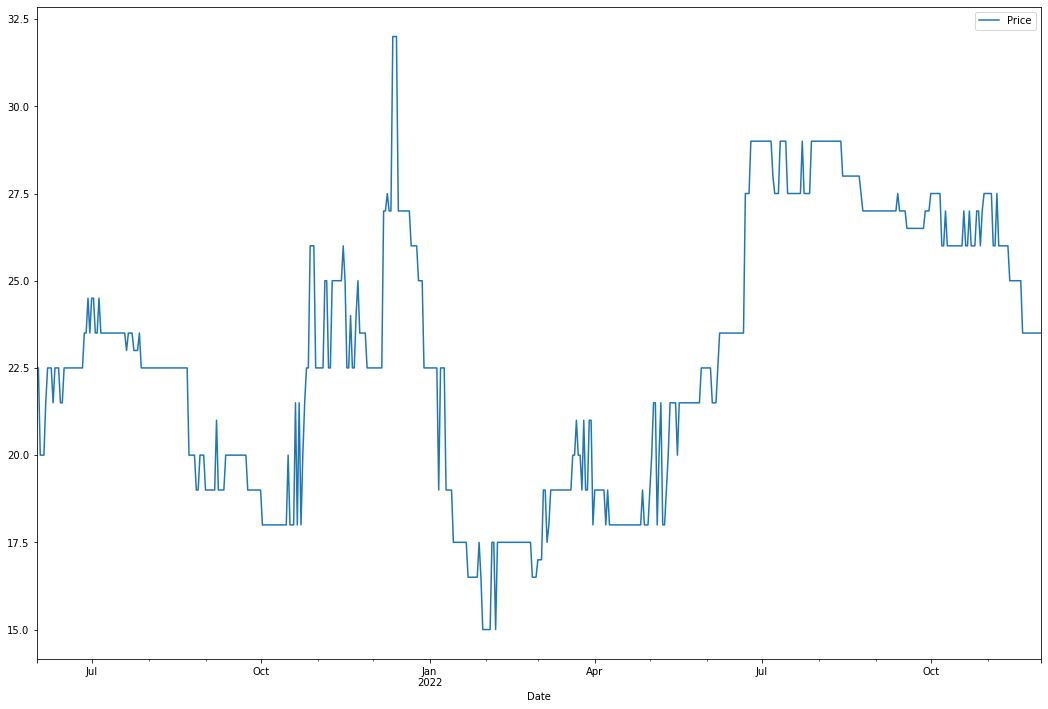

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

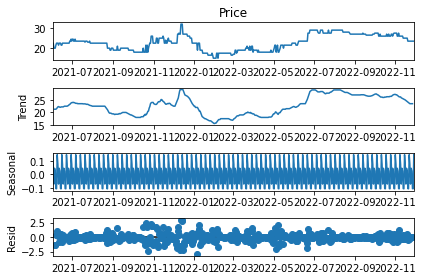

In [9]:
results.plot();

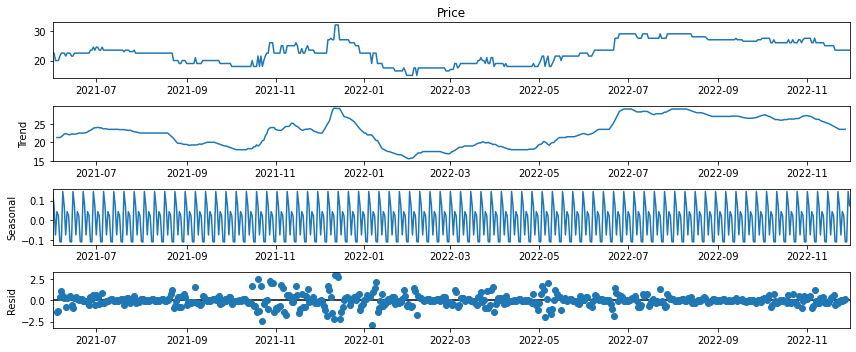

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

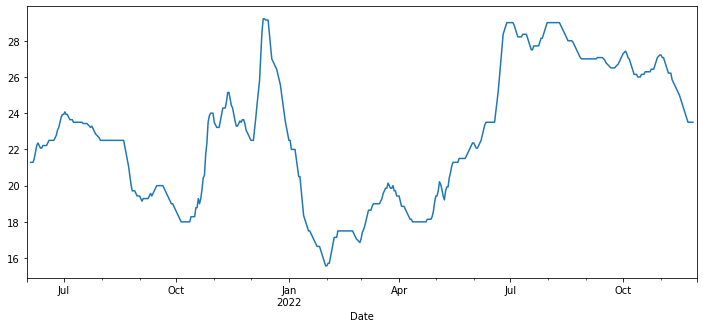

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,22.5
2021-06-02,22.5
2021-06-03,20.0
2021-06-04,20.0
2021-06-05,20.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    25.959230
2022-10-15    26.271736
2022-10-16    26.021733
2022-10-17    26.052981
2022-10-18    25.896716
2022-10-19    25.896696
2022-10-20    26.240448
2022-10-21    26.209211
2022-10-22    26.240454
2022-10-23    26.396706
2022-10-24    26.375702
2022-10-25    26.346309
2022-10-26    25.963942
2022-10-27    25.669808
2022-10-28    25.875695
2022-10-29    25.963919
2022-10-30    26.228632
2022-10-31    26.405096
2022-11-01    26.316848
2022-11-02    26.199182
2022-11-03    26.405073
2022-11-04    26.581542
2022-11-05    26.522714
2022-11-06    26.287393
2022-11-07    26.640332
2022-11-08    26.934452
2022-11-09    26.875635
2022-11-10    26.669738
2022-11-11    26.493264
2022-11-12    26.110896
2022-11-13    26.196727
2022-11-14    26.509233
2022-11-15    26.259231
2022-11-16    26.290478
2022-11-17    26.134214
2022-11-18    26.134193
2022-11-19    26.477945
2022-11-20    26.446709
2022-11-21    26.477951
2022-11-22    26.634203
2022-11-23    26.613200
2022-11-24    26

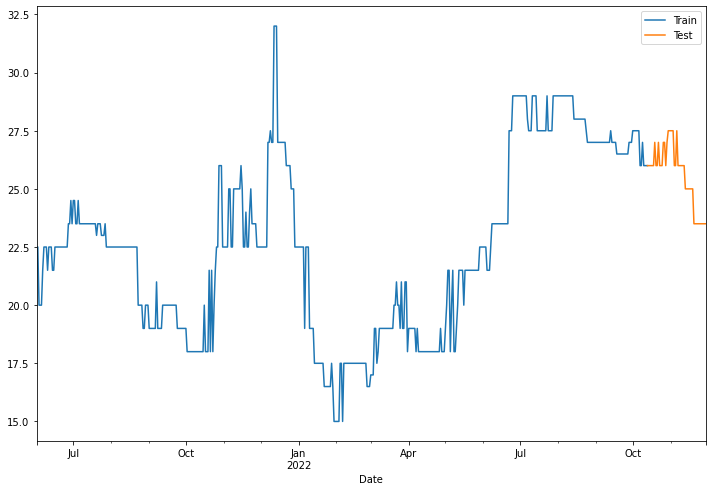

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,25.581633
std,1.335988
min,23.500000
25%,25.000000
50%,26.000000
75%,26.000000
max,27.500000


In [21]:
mean_absolute_error(test_data,test_predictions)


1.186054424311512

In [22]:
mean_squared_error(test_data, test_predictions)

2.455918308804078

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([1.37514278, 1.49153631, 1.39360198, 1.40378309, 1.35930705,
       1.35930237, 1.47732043, 1.46365732, 1.47732308, 1.5533133 ,
       1.54239586, 1.52747105, 1.37644424, 1.32522188, 1.35458871,
       1.37643782, 1.47208912, 1.55773221, 1.51293759, 1.45938541,
       1.55772036, 1.6577865 , 1.62298278, 1.49884463, 1.69389562,
       1.89170775, 1.85010281, 1.71242822, 1.60608539, 1.42427457,
       1.45834821, 1.61520316, 1.48579172, 1.50029996, 1.43310284,
       1.43309507, 1.59744005, 1.58012482, 1.59744338, 1.69007187,
       1.67707164, 1.65915349, 1.46034207, 1.36180063, 1.42512934,
       1.46033226, 1.59084033, 1.69530989, 1.64152643])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

1.5671369783155773

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

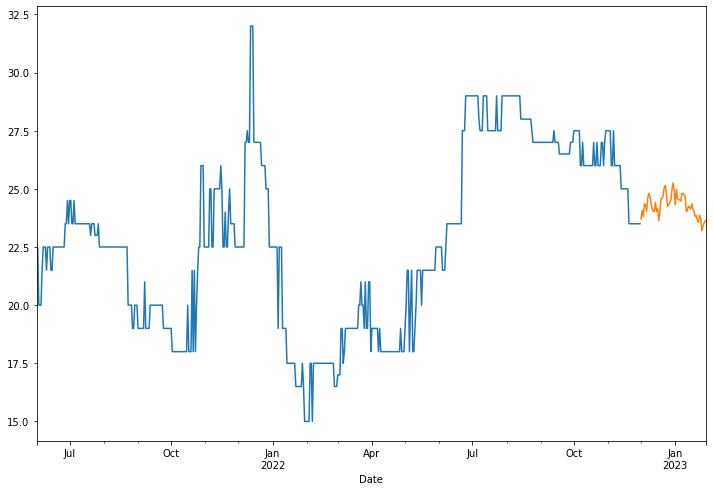

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01    23.697226
2022-12-02    24.086072
2022-12-03    23.808279
2022-12-04    24.363884
2022-12-05    24.308299
2022-12-06    24.030558
2022-12-07    24.586086
2022-12-08    24.808331
2022-12-09    24.697161
2022-12-10    24.363901
2022-12-11    24.141694
2022-12-12    24.030535
2022-12-13    24.030564
2022-12-14    24.419420
2022-12-15    24.030532
2022-12-16    24.141683
2022-12-17    23.641632
2022-12-18    23.974935
2022-12-19    24.586089
2022-12-20    24.586070
2022-12-21    24.697207
2022-12-22    25.086024
2022-12-23    25.141621
2022-12-24    24.752728
2022-12-25    24.252727
2022-12-26    24.308312
2022-12-27    24.419406
2022-12-28    24.530500
2022-12-29    24.974966
2022-12-30    25.252775
2022-12-31    24.919422
2023-01-01    24.308307
2023-01-02    24.975027
2023-01-03    24.586092
2023-01-04    24.530510
2023-01-05    24.530599
2023-01-06    24.475046
2023-01-07    24.808383
2023-01-08    24.808355
2023-01-09    24.752845
2023-01-10    24.641709
2023-01-11    24

# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('Potato.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -1.9229930232088546
p- value: 0.3213229675720902
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,22.5,NaN
2021-06-02,22.5,0.0
2021-06-03,20.0,-2.5
2021-06-04,20.0,0.0
2021-06-05,20.0,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -1.9229930232088546
p- value: 0.3213229675720902
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.861275711573908
p- value: 1.444309333321652e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -3.391742652158662
p- value: 0.0112436055768419
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


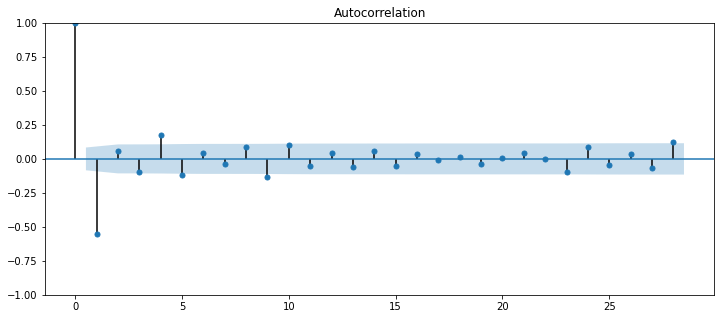

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

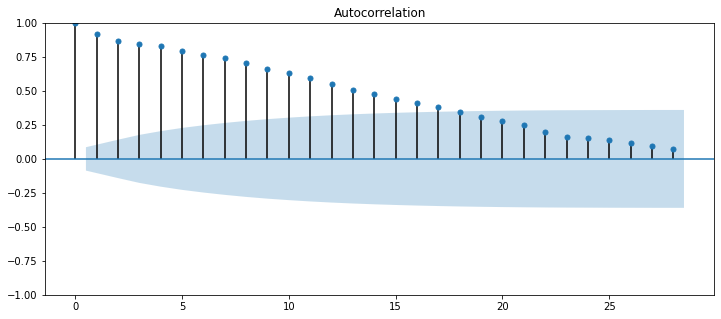

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

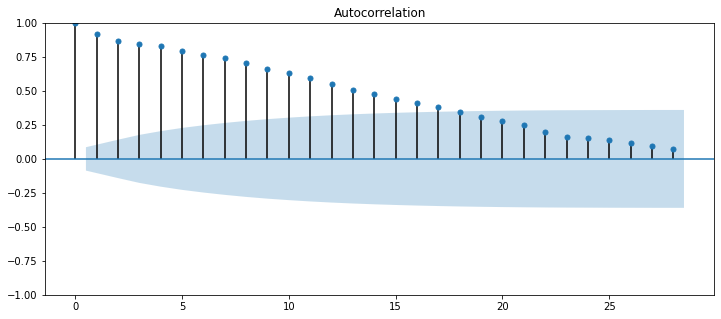

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

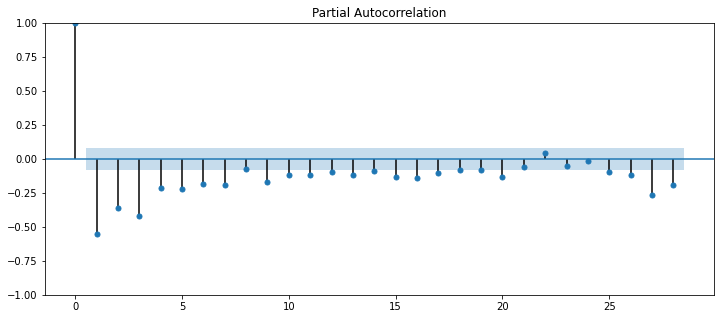

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,27.5,0.0,-0.5,0.5
2022-10-03,27.5,0.0,0.0,0.5
2022-10-04,27.5,0.0,0.0,0.5
2022-10-05,27.5,0.0,0.0,0.5
2022-10-06,27.5,0.0,0.0,0.5
2022-10-07,26.0,-1.5,-1.5,-1.0
2022-10-08,26.0,0.0,1.5,-1.0
2022-10-09,27.0,1.0,1.0,0.0
2022-10-10,26.0,-1.0,-2.0,-1.0


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,22.5,NaN,NaN,NaN
2021-06-02,22.5,0.0,NaN,NaN
2021-06-03,20.0,-2.5,-2.5,NaN
2021-06-04,20.0,0.0,2.5,NaN
2021-06-05,20.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,26.5,0.0,0.0,-0.5
2022-09-28,27.0,0.5,0.5,0.0
2022-09-29,27.0,0.0,-0.5,0.0


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [58]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [59]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood                -781.130
Date:                             Fri, 06 Jan 2023   AIC                           1580.260
Time:                                     23:01:52   BIC                           1617.402
Sample:                                 06-01-2021   HQIC                          1594.888
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9933      0.148      6.690      0.000       0.702       1.284
ar.L2          0.7861      0.222      3.544      0.000       0.351       1.221
ar.L3         -0.7938      0.098     -8.089      0.000      -0.986      -0.601
ma.L1         -0.2868      0.158     -1.821      0.069      -0.595       0.022
ma.L2         -0.9463      0.127     -7.424      0.000      -1.196      -0.696
ma.L3          0.1707      0.071      2.420      0.016       0.032       0.309
ma.L4          0.2146      0.051      4.172      0.000       0.114       0.315
ma.L5          0.0402      0.050      0.802      0.422      -0.058       0.139
sigma2         1.7650      0.063     28.160      0.000       1.642       1.888
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               729.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.41
Prob(H) (two-sided):                  0.16   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [61]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

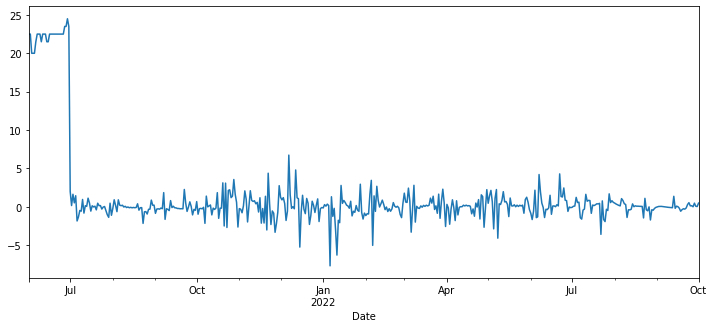

In [62]:
model_SARIMAX_fit.resid.plot()

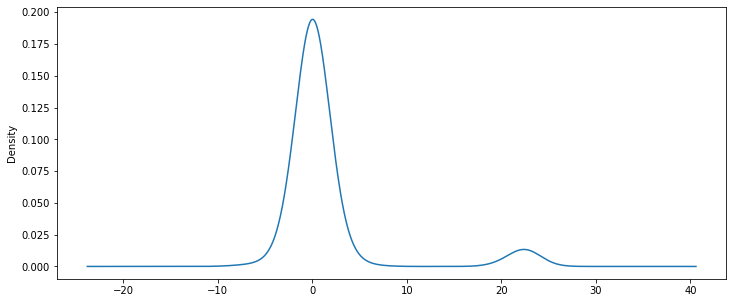

In [63]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [65]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,27.5,0.0,-0.5,0.5,27.436892
2022-10-03,27.5,0.0,0.0,0.5,27.409511
2022-10-04,27.5,0.0,0.0,0.5,27.445809
2022-10-05,27.5,0.0,0.0,0.5,27.522821
2022-10-06,27.5,0.0,0.0,0.5,27.564098
2022-10-07,26.0,-1.5,-1.5,-1.0,27.617437
2022-10-08,26.0,0.0,1.5,-1.0,27.641735
2022-10-09,27.0,1.0,1.0,0.0,27.675035
2022-10-10,26.0,-1.0,-2.0,-1.0,27.684872


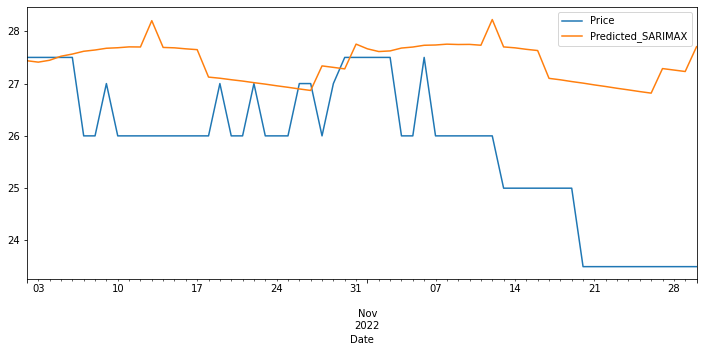

In [66]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [67]:
pred_Sarimax

2022-10-02    27.436892
2022-10-03    27.409511
2022-10-04    27.445809
2022-10-05    27.522821
2022-10-06    27.564098
2022-10-07    27.617437
2022-10-08    27.641735
2022-10-09    27.675035
2022-10-10    27.684872
2022-10-11    27.701535
2022-10-12    27.699385
2022-10-13    28.202539
2022-10-14    27.690755
2022-10-15    27.683237
2022-10-16    27.664002
2022-10-17    27.648339
2022-10-18    27.123627
2022-10-19    27.102038
2022-10-20    27.073600
2022-10-21    27.047997
2022-10-22    27.017347
2022-10-23    26.989349
2022-10-24    26.957768
2022-10-25    26.928720
2022-10-26    26.897263
2022-10-27    26.868251
2022-10-28    27.337763
2022-10-29    27.309643
2022-10-30    27.280773
2022-10-31    27.754192
2022-11-01    27.664309
2022-11-02    27.612353
2022-11-03    27.624291
2022-11-04    27.679042
2022-11-05    27.698566
2022-11-06    27.732133
2022-11-07    27.737361
2022-11-08    27.753446
2022-11-09    27.746886
2022-11-10    27.748865
2022-11-11    27.732906
2022-11-12    28

In [68]:
predicted_value_SARIMA = pred_Sarimax

In [69]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [70]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

1.6332376362412624

In [71]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

4.12652861334031

In [72]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

2.031385884892457

# ***FB Prophet***

In [73]:
df_fb  = pd.read_csv('Potato.csv')

In [74]:
df_fb.columns = ['ds', 'y']

In [75]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [76]:
df_fb.head()

,ds,y
0,2021-06-01,22.5
1,2021-06-02,22.5
2,2021-06-03,20.0
3,2021-06-04,20.0
4,2021-06-05,20.0


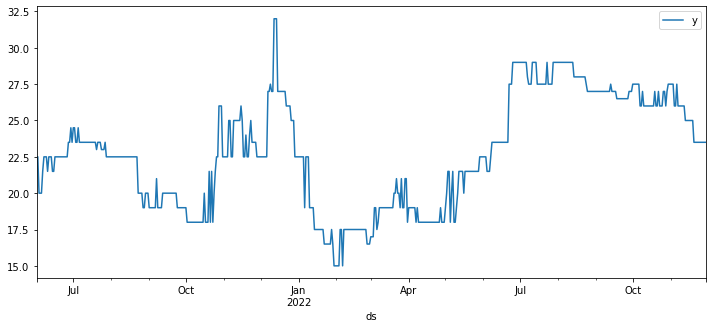

In [77]:
df_fb.plot(x='ds', y='y')

In [78]:
len(df_fb)

548

In [79]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [80]:
import prophet

In [81]:
import io, os, sys, setuptools, tokenize

In [83]:
from fbprophet import Prophet

In [84]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,30.343778,27.496668,33.337651,28.778536,31.672492,0.012003,0.012003,0.012003,0.012003,0.012003,0.012003,0.0,0.0,0.0,30.355781
544,2022-11-27,30.374114,27.266339,33.120917,28.752288,31.744049,-0.120540,-0.120540,-0.120540,-0.120540,-0.120540,-0.120540,0.0,0.0,0.0,30.253574
545,2022-11-28,30.404450,27.313881,33.174606,28.740299,31.817187,-0.088213,-0.088213,-0.088213,-0.088213,-0.088213,-0.088213,0.0,0.0,0.0,30.316237
546,2022-11-29,30.434787,27.494555,33.602998,28.700149,31.886379,0.178312,0.178312,0.178312,0.178312,0.178312,0.178312,0.0,0.0,0.0,30.613099
547,2022-11-30,30.465123,27.499919,33.560442,28.660399,31.942358,0.067246,0.067246,0.067246,0.067246,0.067246,0.067246,0.0,0.0,0.0,30.532369


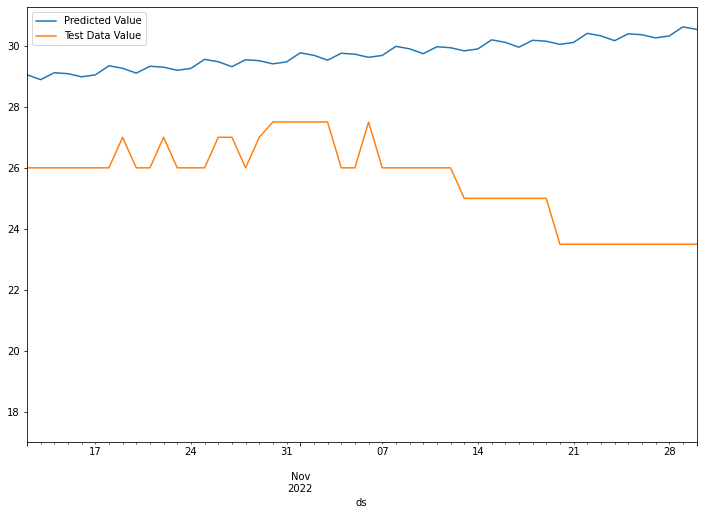

In [86]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [87]:
from statsmodels.tools.eval_measures import rmse

In [88]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [89]:
predictions_fb

488    28.554748
489    28.617411
490    28.914272
491    28.833542
492    28.674226
493    28.900568
494    28.869308
495    28.767101
496    28.829764
497    29.126626
498    29.045896
499    28.886579
500    29.112922
501    29.081662
502    28.979454
503    29.042117
504    29.338979
505    29.258249
506    29.098932
507    29.325275
508    29.294015
509    29.191807
510    29.254471
511    29.551332
512    29.470602
513    29.311286
514    29.537628
515    29.506368
516    29.404161
517    29.466824
518    29.763685
519    29.682956
520    29.523639
521    29.749982
522    29.718721
523    29.616514
524    29.679177
525    29.976039
526    29.895309
527    29.735992
528    29.962335
529    29.931075
530    29.828867
531    29.891530
532    30.188392
533    30.107662
534    29.948346
535    30.174688
536    30.143428
537    30.041221
538    30.103884
539    30.400745
540    30.320015
541    30.160699
542    30.387041
543    30.355781
544    30.253574
545    30.316237
546    30.6130

In [90]:
test_fb

,ds,y
488,2022-10-02,27.5
489,2022-10-03,27.5
490,2022-10-04,27.5
491,2022-10-05,27.5
492,2022-10-06,27.5
493,2022-10-07,26.0
494,2022-10-08,26.0
495,2022-10-09,27.0
496,2022-10-10,26.0
497,2022-10-11,26.0


In [91]:
mean_absolute_error(test_fb['y'], predictions_fb)

3.7708187747454534

In [92]:
mean_squared_error(test_fb['y'], predictions_fb)

17.31178491685865

In [93]:
rmse(predictions_fb, test_fb['y'])

4.160743313022164

In [94]:
test_fb.mean()

y    25.8
dtype: float64

In [95]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [96]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [97]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,29.814630,27.526482,32.127695,29.0,2022-08-02
1,2022-08-04,29.709480,27.177791,32.112663,29.0,2022-08-02
2,2022-08-05,30.041367,27.769675,32.452522,29.0,2022-08-02
3,2022-08-06,30.069956,27.504845,32.331455,29.0,2022-08-02
4,2022-08-07,30.031649,27.651372,32.392768,29.0,2022-08-02


In [99]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.972610,0.986210,0.973290,0.033562,0.035742,1.000000
1,7 days,1.271213,1.127481,1.098672,0.037885,0.036402,1.000000
2,8 days,1.596037,1.263344,1.241422,0.042808,0.038666,1.000000
3,9 days,1.770969,1.330778,1.311334,0.045218,0.045405,1.000000
4,10 days,2.115810,1.454582,1.431795,0.049372,0.052187,1.000000
5,11 days,2.491289,1.578382,1.563405,0.053911,0.054016,1.000000
6,12 days,3.552953,1.884928,1.831796,0.063737,0.057925,0.833333
7,13 days,4.568722,2.137457,2.057978,0.072136,0.062311,0.666667
8,14 days,5.995161,2.448502,2.350026,0.082888,0.081098,0.500000
9,15 days,7.473611,2.733791,2.659444,0.094238,0.101911,0.333333


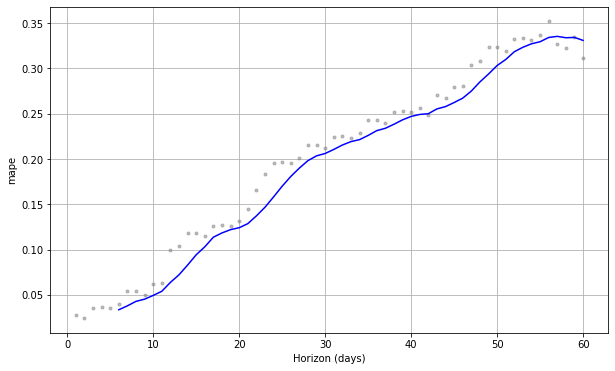

In [100]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [101]:
df_t = pd.read_csv('Potato.csv')

In [102]:
df_t.columns = ['ds', 'y']

In [103]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [104]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [105]:
t.fit(df_t)

In [106]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

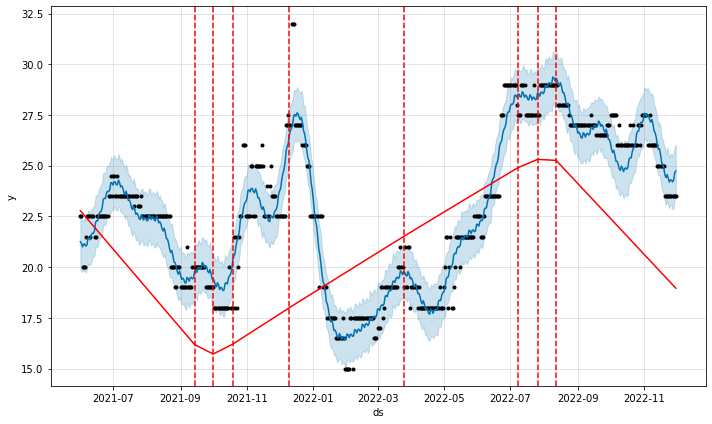

In [107]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [108]:
df_S = pd.read_csv('Potato.csv')

In [109]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


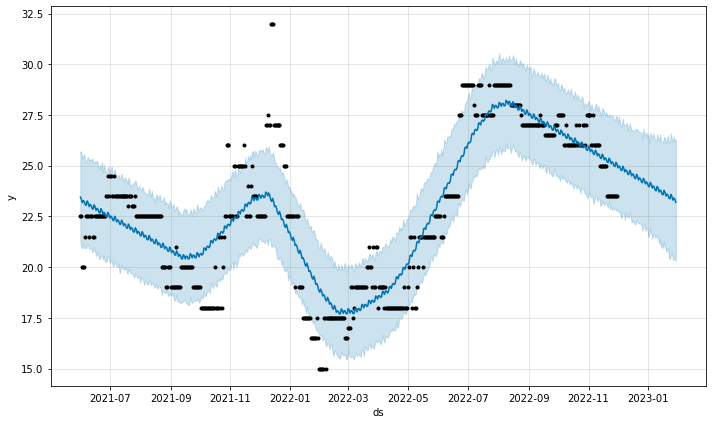

In [110]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

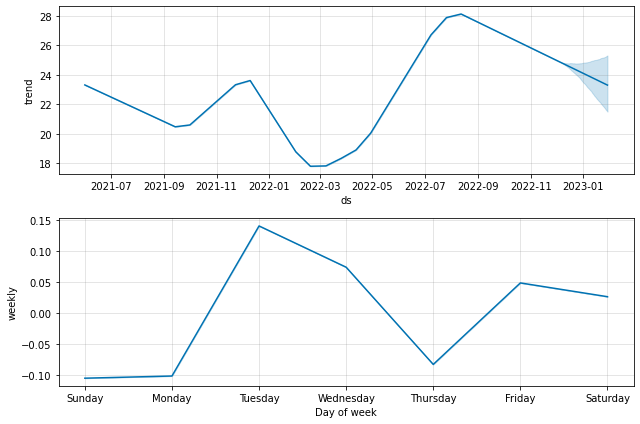

In [111]:
figure = S.plot_components(forecast);

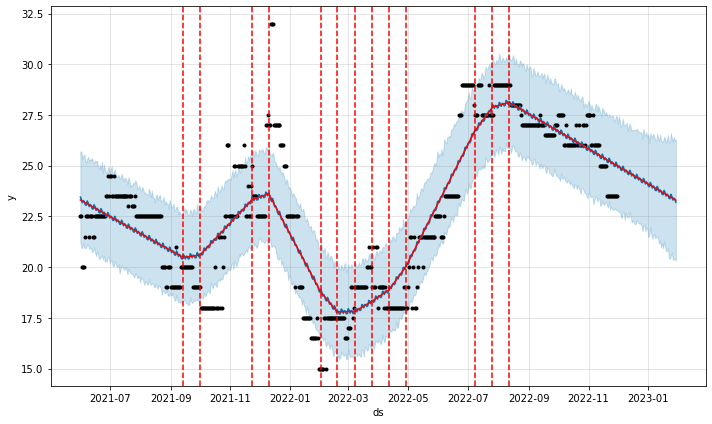

In [112]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


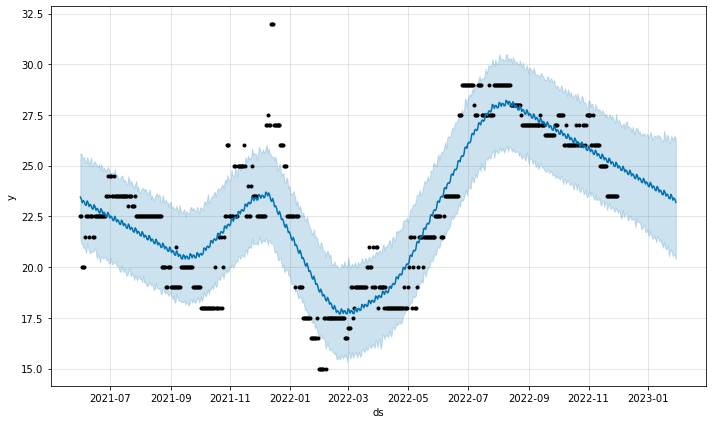

In [113]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

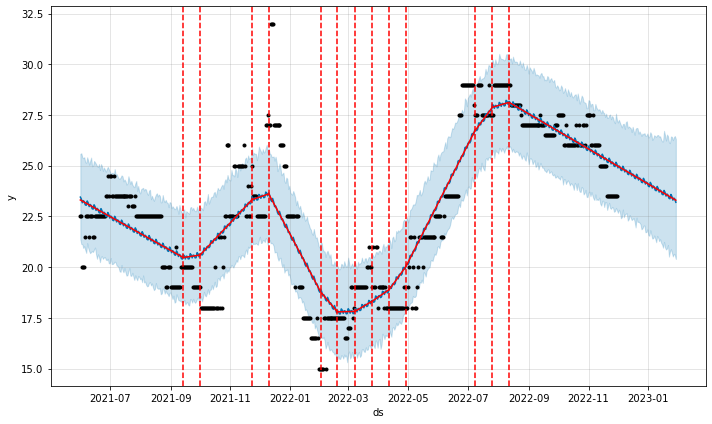

In [114]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

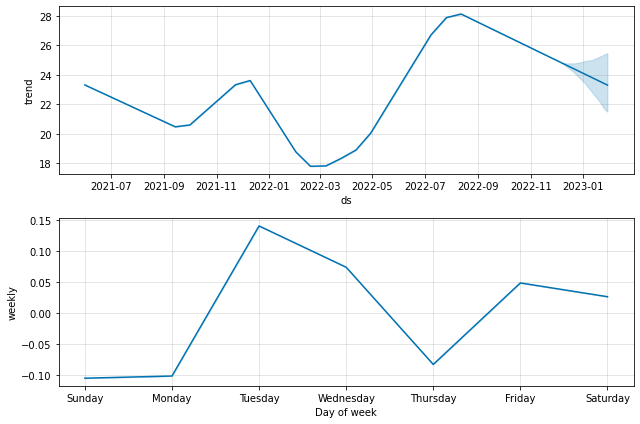

In [115]:
figure = S.plot_components(forecast)

# ***LSTM***

In [116]:
df_LSTM=pd.read_csv("Potato.csv",parse_dates=["Date"],index_col=[0])

In [117]:
print(df_LSTM.index.freq)

None


In [118]:
test_split=round(len(df_LSTM)*0.20)

In [119]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [120]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [121]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [122]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [123]:
df_for_training_scaled

array([[0.44117647],
       [0.44117647],
       [0.29411765],
       [0.29411765],
       [0.29411765],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.38235294],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.5       ],
       [0.5       ],
       [0.55882353],
       [0.5       ],
       [0.55882353],
       [0.55882353],
       [0.5       ],
       [0.5       ],
       [0.55882353],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5  

In [124]:
df_for_training_scaled.shape

(438, 1)

In [125]:
df_for_testing_scaled.shape

(110, 1)

In [126]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [127]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [128]:
trainX.shape

(408, 30, 1)

In [129]:
testX,testY=createXY(df_for_testing_scaled,30)

In [130]:
trainX[0]

array([[0.44117647],
       [0.44117647],
       [0.29411765],
       [0.29411765],
       [0.29411765],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.38235294],
       [0.38235294],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.44117647],
       [0.5       ],
       [0.5       ],
       [0.55882353],
       [0.5       ]])

In [131]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [132]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [133]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.44117647]
 [0.44117647]
 [0.29411765]
 [0.29411765]
 [0.29411765]
 [0.38235294]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.38235294]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.38235294]
 [0.38235294]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.44117647]
 [0.5       ]
 [0.5       ]
 [0.55882353]
 [0.5       ]]

trainY[0]--  0.5588235294117647


In [134]:
trainY[0]

0.5588235294117647

In [135]:
trainY.shape

(408,)

In [136]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [137]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 4s 78ms/step - loss: 0.0997 - val_loss: 0.0577
Epoch 2/32
13/13 [==============================] - 0s 20ms/step - loss: 0.0185 - val_loss: 0.0089
Epoch 3/32
13/13 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.0075
Epoch 4/32
13/13 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 5/32
13/13 [==============================] - 0s 21ms/step - loss: 0.0072 - val_loss: 0.0021
Epoch 6/32
13/13 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 7/32
13/13 [==============================] - 0s 19ms/step - loss: 0.0075 - val_loss: 0.0028
Epoch 8/32
13/13 [==============================] - 0s 21ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 9/32
13/13 [==============================] - 0s 21ms/step - loss: 0.0064 - val_loss: 0.0033
Epoch 10/32
13/13 [==============================] - 0s 20ms/step - loss: 0.0068 - val_loss: 0.0030
Epoch 11/

In [138]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 64, 'optimizer': 'adam'}

In [139]:
my_model=grid_search.best_estimator_.model

In [140]:
my_model

In [141]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 6ms/step


In [142]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.71549624]
 [0.7154058 ]
 [0.72453195]
 [0.72414935]
 [0.7216192 ]
 [0.7189628 ]
 [0.7169151 ]
 [0.7064705 ]
 [0.69695026]
 [0.6902673 ]
 [0.68639386]
 [0.68463576]
 [0.6842192 ]
 [0.6845129 ]
 [0.68508244]
 [0.6856763 ]
 [0.6861724 ]
 [0.69556594]
 [0.70465624]
 [0.7112368 ]
 [0.72431445]
 [0.73503476]
 [0.741906  ]
 [0.7453986 ]
 [0.7465668 ]
 [0.7464152 ]
 [0.71803916]
 [0.69092625]
 [0.6892152 ]
 [0.67686826]
 [0.6663415 ]
 [0.6594054 ]
 [0.65575385]
 [0.65445644]
 [0.6545556 ]
 [0.6553158 ]
 [0.6562582 ]
 [0.65712297]
 [0.6756079 ]
 [0.6758111 ]
 [0.6714563 ]
 [0.6843957 ]
 [0.6800726 ]
 [0.6727441 ]
 [0.6661483 ]
 [0.6792735 ]
 [0.69409764]
 [0.68760145]
 [0.6953255 ]
 [0.7130365 ]
 [0.72850406]
 [0.73893964]
 [0.7446225 ]
 [0.74688154]
 [0.7194661 ]
 [0.692476  ]
 [0.69959515]
 [0.68655944]
 [0.67326427]
 [0.6634967 ]
 [0.65765584]
 [0.6549243 ]
 [0.6542293 ]
 [0.6371234 ]
 [0.62067527]
 [0.6086845 ]
 [0.60142964]
 [0.59790015]
 [0.59682554]
 [0.59713835]
 [0.5728

In [143]:
scaler.inverse_transform(prediction)

array([[27.163435],
       [27.1619  ],
       [27.317041],
       [27.31054 ],
       [27.267525],
       [27.222368],
       [27.187555],
       [27.009998],
       [26.848154],
       [26.734545],
       [26.668695],
       [26.638807],
       [26.631725],
       [26.636719],
       [26.646402],
       [26.656496],
       [26.66493 ],
       [26.824621],
       [26.979156],
       [27.091024],
       [27.313345],
       [27.49559 ],
       [27.6124  ],
       [27.671776],
       [27.691635],
       [27.689058],
       [27.206665],
       [26.745745],
       [26.716658],
       [26.50676 ],
       [26.327805],
       [26.20989 ],
       [26.147816],
       [26.12576 ],
       [26.127445],
       [26.140368],
       [26.15639 ],
       [26.171091],
       [26.485334],
       [26.488789],
       [26.414757],
       [26.634727],
       [26.561234],
       [26.43665 ],
       [26.324522],
       [26.54765 ],
       [26.79966 ],
       [26.689224],
       [26.820534],
       [27.12162 ],


In [144]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [145]:
prediction_copies_array.shape

(80, 1)

In [146]:
prediction_copies_array

array([[0.71549624],
       [0.7154058 ],
       [0.72453195],
       [0.72414935],
       [0.7216192 ],
       [0.7189628 ],
       [0.7169151 ],
       [0.7064705 ],
       [0.69695026],
       [0.6902673 ],
       [0.68639386],
       [0.68463576],
       [0.6842192 ],
       [0.6845129 ],
       [0.68508244],
       [0.6856763 ],
       [0.6861724 ],
       [0.69556594],
       [0.70465624],
       [0.7112368 ],
       [0.72431445],
       [0.73503476],
       [0.741906  ],
       [0.7453986 ],
       [0.7465668 ],
       [0.7464152 ],
       [0.71803916],
       [0.69092625],
       [0.6892152 ],
       [0.67686826],
       [0.6663415 ],
       [0.6594054 ],
       [0.65575385],
       [0.65445644],
       [0.6545556 ],
       [0.6553158 ],
       [0.6562582 ],
       [0.65712297],
       [0.6756079 ],
       [0.6758111 ],
       [0.6714563 ],
       [0.6843957 ],
       [0.6800726 ],
       [0.6727441 ],
       [0.6661483 ],
       [0.6792735 ],
       [0.69409764],
       [0.687

In [147]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [148]:
pred

array([27.163435, 27.1619  , 27.317041, 27.31054 , 27.267525, 27.222368,
       27.187555, 27.009998, 26.848154, 26.734545, 26.668695, 26.638807,
       26.631725, 26.636719, 26.646402, 26.656496, 26.66493 , 26.824621,
       26.979156, 27.091024, 27.313345, 27.49559 , 27.6124  , 27.671776,
       27.691635, 27.689058, 27.206665, 26.745745, 26.716658, 26.50676 ,
       26.327805, 26.20989 , 26.147816, 26.12576 , 26.127445, 26.140368,
       26.15639 , 26.171091, 26.485334, 26.488789, 26.414757, 26.634727,
       26.561234, 26.43665 , 26.324522, 26.54765 , 26.79966 , 26.689224,
       26.820534, 27.12162 , 27.38457 , 27.561974, 27.658583, 27.696985,
       27.230923, 26.77209 , 26.893116, 26.67151 , 26.445492, 26.279442,
       26.18015 , 26.133713, 26.121899, 25.831097, 25.55148 , 25.347635,
       25.224302, 25.164303, 25.146034, 25.151352, 24.738487, 24.32339 ,
       24.007614, 23.805143, 23.696373, 23.652973, 23.649235, 23.66566 ,
       23.688967, 23.711714], dtype=float32)

In [149]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [150]:
pred

array([27.163435, 27.1619  , 27.317041, 27.31054 , 27.267525, 27.222368,
       27.187555, 27.009998, 26.848154, 26.734545, 26.668695, 26.638807,
       26.631725, 26.636719, 26.646402, 26.656496, 26.66493 , 26.824621,
       26.979156, 27.091024, 27.313345, 27.49559 , 27.6124  , 27.671776,
       27.691635, 27.689058, 27.206665, 26.745745, 26.716658, 26.50676 ,
       26.327805, 26.20989 , 26.147816, 26.12576 , 26.127445, 26.140368,
       26.15639 , 26.171091, 26.485334, 26.488789, 26.414757, 26.634727,
       26.561234, 26.43665 , 26.324522, 26.54765 , 26.79966 , 26.689224,
       26.820534, 27.12162 , 27.38457 , 27.561974, 27.658583, 27.696985,
       27.230923, 26.77209 , 26.893116, 26.67151 , 26.445492, 26.279442,
       26.18015 , 26.133713, 26.121899, 25.831097, 25.55148 , 25.347635,
       25.224302, 25.164303, 25.146034, 25.151352, 24.738487, 24.32339 ,
       24.007614, 23.805143, 23.696373, 23.652973, 23.649235, 23.66566 ,
       23.688967, 23.711714], dtype=float32)

In [151]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [27.163435 27.1619   27.317041 27.31054  27.267525 27.222368 27.187555
 27.009998 26.848154 26.734545 26.668695 26.638807 26.631725 26.636719
 26.646402 26.656496 26.66493  26.824621 26.979156 27.091024 27.313345
 27.49559  27.6124   27.671776 27.691635 27.689058 27.206665 26.745745
 26.716658 26.50676  26.327805 26.20989  26.147816 26.12576  26.127445
 26.140368 26.15639  26.171091 26.485334 26.488789 26.414757 26.634727
 26.561234 26.43665  26.324522 26.54765  26.79966  26.689224 26.820534
 27.12162  27.38457  27.561974 27.658583 27.696985 27.230923 26.77209
 26.893116 26.67151  26.445492 26.279442 26.18015  26.133713 26.121899
 25.831097 25.55148  25.347635 25.224302 25.164303 25.146034 25.151352
 24.738487 24.32339  24.007614 23.805143 23.696373 23.652973 23.649235
 23.66566  23.688967 23.711714]

Original Values--  [27.  27.5 27.  27.  27.  27.  26.5 26.5 26.5 26.5 26.5 26.5 26.5 26.5
 26.5 26.5 27.  27.  27.  27.5 27.5 27.5 27.5 27.5 27.5 26.  26.  27.
 26.  2

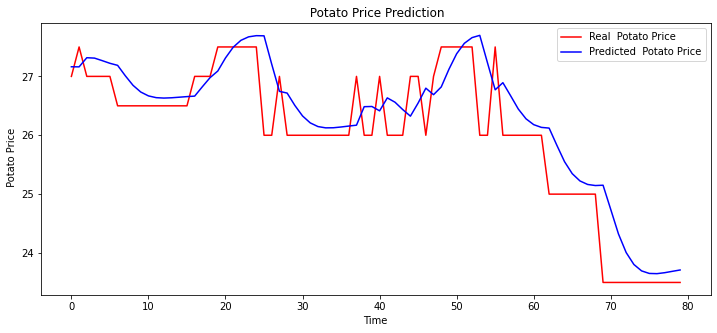

In [152]:
plt.plot(original, color = 'red', label = 'Real  Potato Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Potato Price')
plt.title(' Potato Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Potato Price')
plt.legend()
plt.show()

In [153]:
mean_absolute_error(original, pred)

0.4297999620437622

In [154]:
mean_squared_error(original, pred)

0.32784328198545154

In [155]:
rmse(pred, original)

0.572576005422382